In [1]:
import numpy as np
import pandas as pd
from skbio.stats.composition import clr
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from debiasm.torch_functions import rescale
from scipy.stats import pointbiserialr
from matplotlib.colors import LogNorm, Normalize

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
            'grid.color': 'black'
            }, 
       font_scale=2)
np.random.seed(0)

### description of experiment
- we generate a set of 50 positive and 50 negative samples
- samples w/ a positive `y` have 30 features drawn from a uniform distribution, and one that is empty
- samples w/ a negative `y` have 20 features drawn from a uniform distribution, and 11 empty features. 
- By construction, one feature is empty for all samples; question: will a clr transform introduce an association with `y` for that empty sample?
- We give all features an added pseudocount of $10^{-6}$, before which we rescale all samples to represent a relative abundance space
- Next, we run clr transfom using scipy.stats.composition's implementation

In [2]:
n_samples=100
frac_pos=.5
n_features_both = 20
n_features_pos = 10
n_features_empty = 1

n_pos = int( n_samples*frac_pos )
n_neg = n_samples-n_pos
# X = np.zeros((n_samples,
#              n_features_both + \
#              n_features_pos + \
#              n_features_empty
#              ))

X = np.hstack((
    np.vstack( ( np.random.uniform(size=( n_pos, n_features_both + n_features_pos )), 
            
                np.hstack(( np.random.uniform(size = ( n_neg, n_features_both )), 
                            np.zeros((n_neg, n_features_pos))
                          ) ))), 
    np.zeros((n_samples, n_features_empty)) 
        )) 


y = np.array([1]*n_pos + [0]*n_neg)

rsc_df = rescale(X)
pseudocount = 10**np.floor(np.log10(rsc_df[rsc_df != 0].min()))

p-value of transformed empty feature and outcome:

In [3]:
X_clr = clr( rescale( pseudocount + rescale(X) ) ) ## the second `rescale` is different

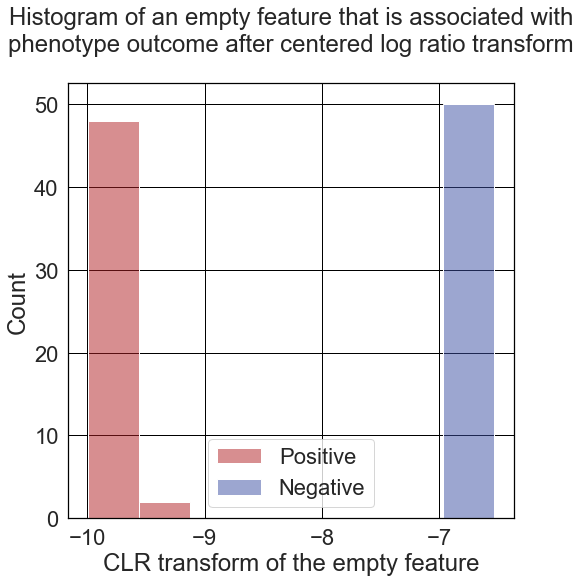

In [4]:

plt.figure(figsize=(8,8))
ax=sns.histplot(x = X_clr[:, -1], 
                hue = ['Negative' if not i else 'Positive' for i in y], 
                palette={'Negative':'#3b4ea2',
                         'Positive':'#b11e23'}
             )
plt.title("Histogram of an empty feature that is associated with\n"+\
            "phenotype outcome after centered log ratio transform\n"
         )
plt.xlabel('CLR transform of the empty feature')
plt.savefig('plots/Fig-1.pdf', 
            dpi=900,
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

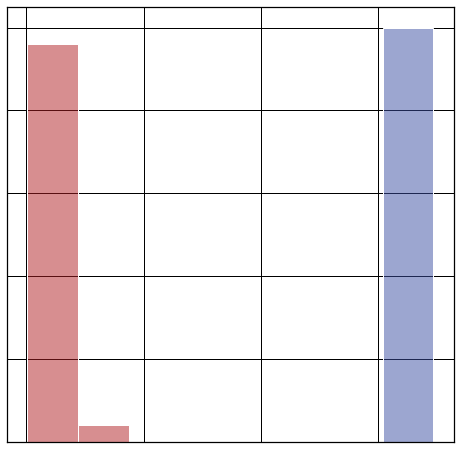

In [5]:
plt.figure(figsize=(8,8))
ax=sns.histplot(x = X_clr[:, -1], 
                hue = ['Negative' if not i else 'Positive' for i in y] ,
                palette={'Negative':'#3b4ea2',
                         'Positive':'#b11e23'}
                 )
plt.title("Histogram of an empty feature that is associated with\n"+\
            "phenotype outcome after centered log ratio transform\n"
         )
plt.xlabel('CLR transform of the empty feature')
ax.get_legend().remove()
ax.set(
       yticklabels=[], 
       xticklabels=[])
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)
plt.savefig('plots/Fig-1-no-axes.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

In [6]:
rescale( pseudocount + rescale(X) )[:, -1].round(9)

array([1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06])

In [7]:
from scipy.stats import mannwhitneyu
mannwhitneyu(X_clr[:, -1][y==0], 
             X_clr[:, -1][y==1]
             )

MannwhitneyuResult(statistic=0.0, pvalue=3.533035965194466e-18)

In [8]:
def geo_mean(iterable): # credit to stack overflow
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

In [9]:
X_rs = rescale( pseudocount + rescale(X) ).round(9)

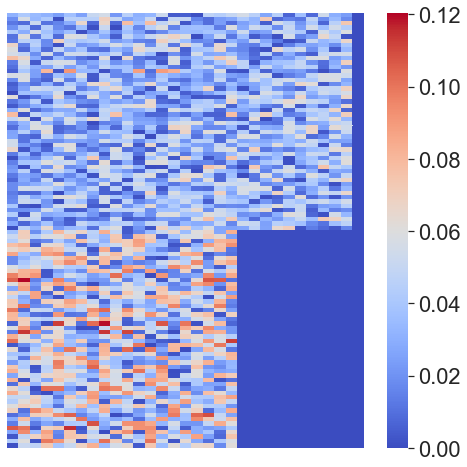

In [10]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(rescale(X), cmap='coolwarm')
ax.set(
       yticklabels=[], 
       xticklabels=[]
)
plt.savefig('plots/Fig-1-dataset-heatmap.pdf', 
            bbox_inches='tight', 
            dpi=900, 
            format='pdf'
            )
# plt.title('Relative abundance of simulated dataset')
plt.show()

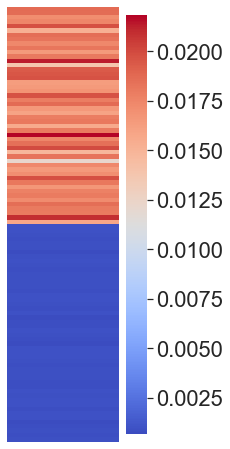

In [11]:
plt.figure(figsize = (2.5,8))
ggm=np.array([geo_mean(a) for a in X_rs])[:, np.newaxis]
ax = sns.heatmap(ggm,# - ggm.min()+1e-3, 
#                 norm=LogNorm(), 
                cmap='coolwarm', 
#                 vmin=1e-4, 
#                 vmax=100
                )
ax.set(
       yticklabels=[], 
       xticklabels=[]
)
plt.savefig('plots/Fig-1-dataset-geometric-mean.pdf', 
            bbox_inches='tight', 
            dpi=900, 
            format='pdf'
            )
# plt.title('Geometric mean')
plt.show()

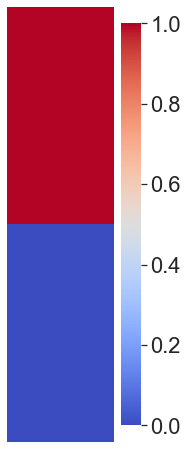

In [12]:

plt.figure(figsize=(2.4,8))
ax = sns.heatmap(np.array(y)[:, np.newaxis], 
                 cmap='coolwarm'
                )
ax.set(
       yticklabels=[], 
       xticklabels=[]
       )
plt.savefig('plots/Fig-1-dataset-labels.pdf', 
            bbox_inches='tight', 
            dpi=900, 
            format='pdf'
            )
plt.show()

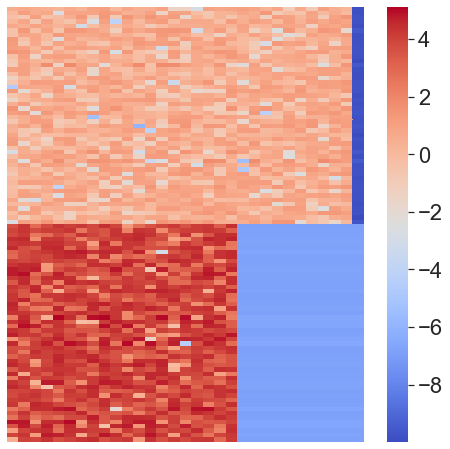

In [13]:
from matplotlib.colors import LogNorm, Normalize
plt.figure(figsize=(8,8))
ax = sns.heatmap(X_clr, 
                 cmap='coolwarm',
                 )
ax.set(
       yticklabels=[], 
       xticklabels=[]
       )
plt.savefig('plots/Fig-1-dataset-clr.pdf', 
            bbox_inches='tight', 
            dpi=900, 
            format='pdf'
            )
# plt.title('CLR transform of simulated dataset')
plt.show()

In [14]:
X_clr[:, -1]

array([-9.83818015, -9.83314304, -9.74879889, -9.76865982, -9.89496248,
       -9.6314239 , -9.82832546, -9.81515878, -9.76436073, -9.81147667,
       -9.71371915, -9.80059377, -9.97095572, -9.53593702, -9.87142911,
       -9.88099316, -9.88844761, -9.70259296, -9.71296976, -9.72868033,
       -9.88790081, -9.79456921, -9.83990636, -9.71765279, -9.68190584,
       -9.79445686, -9.80732721, -9.65401417, -9.79803553, -9.99103799,
       -9.7687469 , -9.82383747, -9.90295441, -9.60638951, -9.81608534,
       -9.41133412, -9.76532728, -9.71231493, -9.74681574, -9.89264969,
       -9.80669447, -9.72215563, -9.78157675, -9.79851016, -9.75514282,
       -9.83015045, -9.79993993, -9.79713029, -9.9486388 , -9.66938548,
       -6.8704822 , -6.85920341, -6.83385718, -6.74447044, -6.80023635,
       -6.81326652, -6.64301832, -6.81714547, -6.84913589, -6.78386699,
       -6.69786406, -6.74948955, -6.76288527, -6.83375726, -6.82567279,
       -6.69084164, -6.87364587, -6.8525895 , -6.82341595, -6.74

In [15]:
np.log(X_rs[:, -1] / np.array([geo_mean(a) for a in X_rs]) )

array([-9.83815016, -9.83311305, -9.74876888, -9.76862977, -9.89493249,
       -9.63139388, -9.82829547, -9.81512878, -9.76433073, -9.81144666,
       -9.71368917, -9.80056378, -9.97092572, -9.53590702, -9.87139911,
       -9.88096316, -9.88841761, -9.70256298, -9.71293968, -9.72865034,
       -9.8878708 , -9.79453921, -9.83987636, -9.71762279, -9.6818759 ,
       -9.79442693, -9.80729721, -9.65398443, -9.79800556, -9.99100799,
       -9.7687169 , -9.82380747, -9.90292441, -9.60635953, -9.81605534,
       -9.41130388, -9.76529728, -9.71228497, -9.74678574, -9.8926197 ,
       -9.80666447, -9.72212562, -9.78154675, -9.79848017, -9.75511281,
       -9.83012044, -9.79990994, -9.79710028, -9.9486088 , -9.6693555 ,
       -6.8704622 , -6.85918341, -6.83383718, -6.74445044, -6.80021635,
       -6.81324652, -6.64299809, -6.81712547, -6.84911588, -6.78384699,
       -6.69784408, -6.74946955, -6.76286527, -6.83373726, -6.82565279,
       -6.69082164, -6.87362587, -6.85256949, -6.82339594, -6.74

In [16]:
pd.Series( ( np.array([geo_mean(a) for a in X_rs])[y==0] ) ).describe()

count    50.000000
mean      0.000882
std       0.000076
min       0.000687
25%       0.000829
50%       0.000904
75%       0.000945
max       0.000990
dtype: float64

In [17]:
pd.Series( ( np.array([geo_mean(a) for a in X_rs])[y==1] ) ).describe()

count    50.000000
mean      0.017791
std       0.001785
min       0.012226
25%       0.016710
50%       0.017990
75%       0.018627
max       0.021829
dtype: float64

In [18]:
mannwhitneyu( np.array([geo_mean(a) for a in X_rs])[y==0],
              np.array([geo_mean(a) for a in X_rs])[y==1] 
            )

MannwhitneyuResult(statistic=0.0, pvalue=3.533035965194466e-18)

In [19]:
pd.Series( ( X_clr[:, -1] )[y==0] ).describe()

count    50.000000
mean     -6.778587
std       0.089123
min      -6.897863
25%      -6.851726
50%      -6.807391
75%      -6.720644
max      -6.532037
dtype: float64

In [20]:
pd.Series( ( X_clr[:, -1] )[y==1] ).describe()

count    50.000000
mean     -9.781268
std       0.104420
min      -9.991038
25%      -9.832395
50%      -9.797583
75%      -9.723787
max      -9.411334
dtype: float64

In [21]:
np.log( np.power(10., -5) / 0.02 )

-7.600902459542082

In [22]:
np.log( np.power(10., -5) / 0.002 )

-5.298317366548036

In [23]:
pd.Series( rescale( pseudocount + rescale(X) )[:, -1] ).nunique()
## rounding to 9 because this step had some rounding errors...
## this is carried through in the clr analysis above

5

In [24]:
pd.Series( rescale( pseudocount + rescale(X) )[:, -1].round(9) ).nunique()
## rounding to 9 because this step had some rounding errors...
## this is carried through in the clr analysis above

## to have multiple unique values before clr would undermine our argument..

1